# ToDo
- sample based on motion
- at beginning of epoch:
- sample subset of training set
- train on subset
- sample at different frequencies



# Interpolate

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_pickle("/media/martin/Samsung_T5/data/endoscopic_data/cholec80_single_video_frames_cropped/pre_processed_5th_frame_log_new_test_train.pkl")
df.frame = df.frame.astype(float)

print("Raw***********************************\n", df)

# valid values
valid = ~df.duv_mpd.isna().values

# interpolation
inter = np.interp(df.frame.values, df.frame[valid].values, df.duv_mpd[valid].values)

# set
df.duv_mpd = inter.tolist()

# reset to int
df.frame = df.frame.astype(np.int32)

# df = df.to_pickle("/media/martin/Samsung_T5/data/endoscopic_data/cholec80_single_video_frames_cropped/pre_processed_5th_frame_interpolated_log_new_test_train.pkl")
print("Interpolated***********************************\n", df)

# Sample
- Generate PDF, see https://stackoverflow.com/questions/25577352/plotting-cdf-of-a-pandas-series-in-python
- Sample with inverse PDF

In [1]:
import pandas as pd




# df = pd.read_pickle("/media/martin/Samsung_T5/data/endoscopic_data/cholec80_single_video_frames_cropped/pre_processed_5th_frame_interpolated_log_new_test_train.pkl")
df = pd.read_pickle("/media/martin/Samsung_T5/data/endoscopic_data/cholec80_single_video_frames_cropped/pre_processed_5th_frame_log_new_test_train_no_nan.pkl")

In [ ]:
import matplotlib.pyplot as plt

# df.duv_mpd.max()



# https://stackoverflow.com/questions/25577352/plotting-cdf-of-a-pandas-series-in-python
# label_df = pd.read_pickle("/media/martin/Samsung_T5/data/endoscopic_data/cholec80_frames/pre_processed_log_test_train_labels.pkl")

# df.duv_mpd = df.duv_mpd.round(decimals=2)
# # data_df['duv_mpd_ra'] = data_df.duv_mpd.rolling(25).mean()
# # data_df.duv_mpd_ra = data_df.duv_mpd_ra.round(decimals=2)

# # # for phase>
# # phases = label_df.Phase.unique()

# # Frequency
# stats_data_df = df.groupby('duv_mpd')['duv_mpd'].agg('count').pipe(pd.DataFrame).rename(columns = {'duv_mpd': 'frequency'})

# # Pdata_df
# stats_data_df['pdata_df'] = stats_data_df['frequency'] / sum(stats_data_df['frequency'])

# stats_data_df = stats_data_df.reset_index()


# print(stats_data_df.pdata_df.max(), stats_data_df.iloc[stats_data_df.pdata_df.argmax()])

# plt.plot(stats_data_df.duv_mpd, stats_data_df.pdata_df)
# plt.grid()
# plt.legend()
# plt.title("Camera Motion Distribution Cholec80")
# plt.xlabel("Mean Pairwise Distance duv / pixels")
# plt.ylabel("Probability Density")
# plt.ylim([0, 0.02])
# plt.show()



# # print(df[df.duv_mpd == 19.7])
# print(stats_data_df)
# print("\n")
# print(df.duv_mpd)

# # df.sample()




# df.duv_mpd.plot.kde()






# https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.gaussian_kde.html#scipy-stats-gaussian-kde


# # how to sample?
# # train/test split ImageSequenceDataset?
# # 

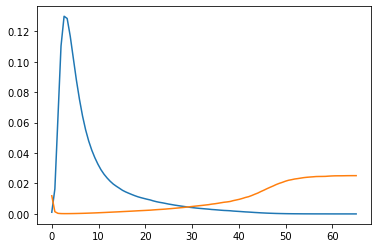

In [10]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

kernel = gaussian_kde(df.duv_mpd)

x = np.linspace(0, df.duv_mpd.max(), 100)
p = kernel(x)
p_rec = 1/(p+0.001)
p_rec = p_rec / p_rec.sum()

plt.plot(x, p)
plt.plot(x, p_rec)
plt.show()

In [4]:
import pandas as pd

data = pd.read_pickle("/media/martin/Samsung_T5/data/endoscopic_data/cholec80_single_video_frames_cropped/pre_processed_1st_frame_log_test_train.pkl")
labels = pd.read_pickle("/media/martin/Samsung_T5/data/endoscopic_data/cholec80_single_video_frames_cropped/pre_processed_1st_frame_log_test_train_labels.pkl")
data.duv.rolling(25).sum()

DataError: No numeric types to aggregate